In [1494]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt       #plots/graphs
import random
import math
from sklearn.model_selection import train_test_split

import sklearn


  
  


In [1495]:
# For Linear Regression
# Compute the model vector when using L2-norm regularization
# w_star = (X^T X + LI)^(-1) X^T t
# @feature :: Nx(d+1) matrix
# @target :: Nx1 vector
# @lam :: scalar regularization parameter, lambda
# Returns :: w_star --> (d+1)x1 model vector

def ridge_regression(feature, target, lam = 1e-17):
    #TODO
    
    dim = feature.shape[1]
    w_star = np.dot(np.linalg.inv(np.dot(feature.T, feature) + lam * np.identity(dim)), np.dot(feature.T, target))
    return w_star

In [1496]:
# For Linear Regression
# Compute the mean square error (MSE) between the true and predicted labels
# @true_label :: y --> Nx1 vector
# @predicted_label :: y^ --> Nx1 vector
# Returns :: scalar MSE value

def mean_squared_error(true_label, predicted_label):
    
    mse = np.sqrt(np.sqrt(np.sum((true_label - predicted_label) ** 2)) / true_label.size)
    return mse

In [1497]:
x, y = datasets.make_regression(n_samples=1000, n_features=50, noise = 0)

print(len(x), len(y))


1000 1000


In [1498]:
def gradient_descent(feature, y, w, lam = 1e-17, threshold = 1e-50, max = 1000):
    t = 0
    error = []
    n = 0.0001
    error.append(mean_squared_error(y, np.dot(x, w)))
    
    while True:
        
        gradient =  np.dot(feature.T, (np.dot(feature, w) - y)) + (lam * w)
        w = w - (n * gradient) 
        temp_error = mean_squared_error(y, np.dot(x, w))  
        error.append(temp_error)
        
        if error[-2] - error[-1] < threshold:
            break
        
        if t > max:
            break
        t += 1
        
        
    return w, error

In [1499]:
w = ridge_regression(x, y)
w_new, grad = gradient_descent(x, y, w)

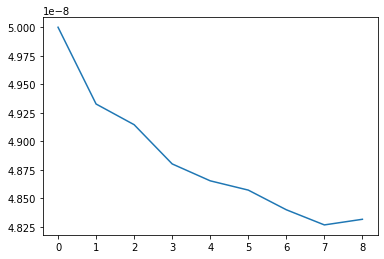

In [1500]:
plt.figure()
plt.plot(grad)
plt.show()

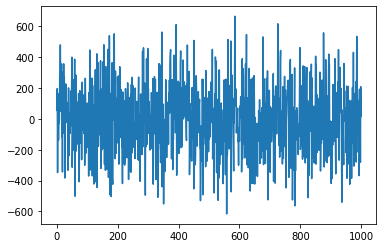

In [1312]:
plt.figure()
plt.plot(y)
plt.show()

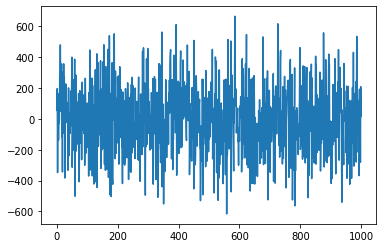

In [1313]:
plt.figure()
plt.plot(np.dot(x, w_new))
plt.show()

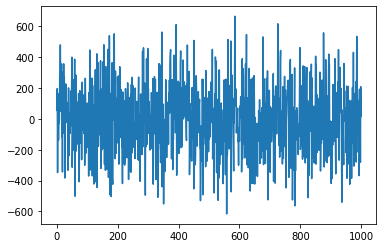

In [1314]:
plt.figure()
plt.plot(np.dot(x, w))
plt.show()

In [1315]:
def stochastic_gradient_descent(feature, y, w, batch, lam = 1e-17, threshold = 1e-5000, max = 100):

    t = 0
    error = []
    n = 0.0001
    
    while True:
        random_int = random.randint(batch,len(feature))
        x_temp = feature[random_int - batch:random_int]
        y_temp = y[random_int - batch:random_int]
        # Compute gradient
        gradient = np.dot(feature.T,np.dot(feature, w) - y) + lam * w
        # Update the model
        w = w - (n * gradient)
        # Compute the error (objective value)
        temp_error = mean_squared_error(y_temp, np.dot(x_temp, w))  
        error.append(temp_error)
        
#         if (len(error) > 2):        
#             if error[-2] - error[-1] < threshold:
#                 break
        
        if t > max:
            break
        t += 1

    return w, error

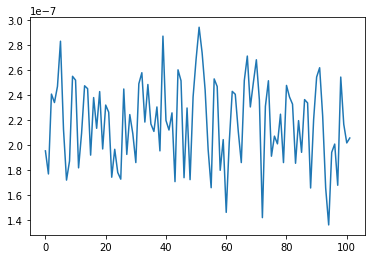

In [1316]:
w = ridge_regression(x, y)
w_new, err = stochastic_gradient_descent(x, y, w, 5)
plt.figure()
plt.plot(err)
plt.show()

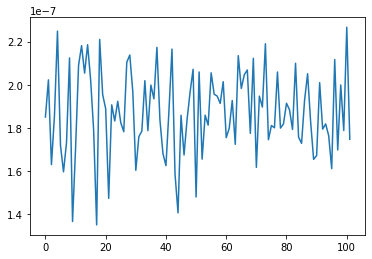

In [1317]:
w = ridge_regression(x, y)
w_new, err = stochastic_gradient_descent(x, y, w, 10)

plt.figure()
plt.plot(err)
plt.show()

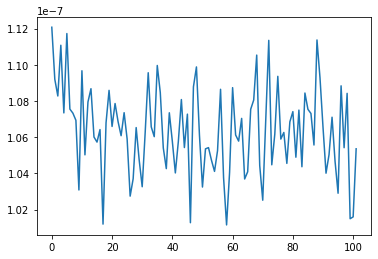

In [1318]:
w = ridge_regression(x, y)
w_new, err = stochastic_gradient_descent(x, y, w, 100)

plt.figure()
plt.plot(err)
plt.show()

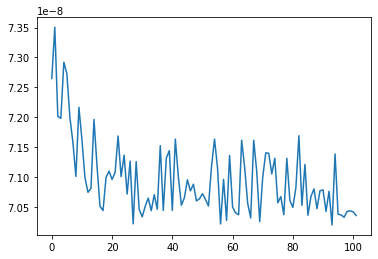

In [1319]:
w = ridge_regression(x, y)
w_new, err = stochastic_gradient_descent(x, y, w, 500)

plt.figure()
plt.plot(err)
plt.show()

In [1320]:
File_data = np.loadtxt("ZipDigits.train", dtype=float)
filtered = []

for i in range(len(File_data)):
    if File_data[i][0] == 1.00 or File_data[i][0] == 5.000:
        filtered.append(File_data[i])
        


five = []
one = []
for i in range(len(filtered)):
    if filtered[i][0] == 5.00:
        temp = filtered[i][1:]
        five.append(temp)
        
for i in range(len(filtered)):
    if filtered[i][0] == 1.00:
        temp = filtered[i][1:]
        one.append(temp)

In [1321]:
final_one = []
final_five = []
shape = (16,16)

for i in one:
    final_one.append(i.reshape(shape))
    
for i in five:
    final_five.append(i.reshape(shape))



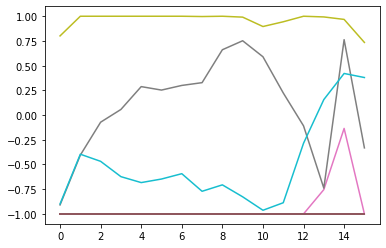

In [1322]:
plt.figure()
plt.plot(final_one[1])
plt.show()

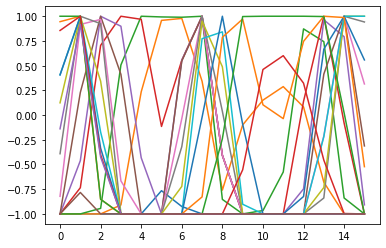

In [1323]:
plt.figure()
plt.plot(final_five[84])
plt.show()

In [1324]:
train_one_intensity = []
for i in range(len(final_one)):
    train_one_intensity.append((sum(sum(final_one[i]))))


train_five_intensity = []
for i in range(len(final_five)):
    train_five_intensity.append((sum(sum(final_five[i]))))

In [1392]:
train_one_sym = []
for i in range(len(final_one)):
    train_one_sym.append(sum(sum(np.abs(final_one[i] - np.fliplr(final_one[i])))))
    
    
train_five_sym = []
for i in range(len(final_five)):
    train_five_sym.append(sum(sum(np.abs(final_five[i] - np.fliplr(final_five[i])))))

-180.0947631840796


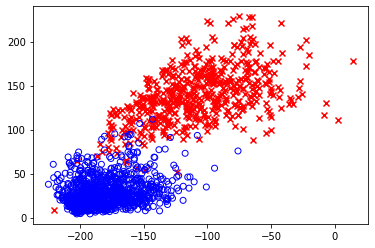

In [1387]:
plt.figure()
plt.scatter(train_five_intensity, train_five_sym, marker = "x", color = "red")
plt.scatter(train_one_intensity, train_one_sym, marker = 'o', facecolors = "None", color = 'blue')
plt.show()

In [1388]:
def sigmoid (temp):
    
    temp = 1 / (1 + np.exp(temp))
    
    return temp

In [1506]:
def logistic_reg(feature,target,iterations = 1000, threshold = 1e-10, N = 0.001):

#     dim = feature.shape[1]
    w = np.zeros((feature.shape[1], 1))
    m, n = feature.shape
    predicted = []
    
    sig_val = np.zeros((target.shape))
    err = []
    
    for i in range(iterations):

        sig_formula = np.dot(feature, w) * -target     
        sig_val = sigmoid(sig_formula)
        gradient = 1 / m * np.dot(feature.T, target - sig_val)
        w = w - (N * gradient) 
        
        loss = 1 / m * np.sum(target * np.log(np.dot(feature, w) + (1 - target) * np.log(np.dot(feature, w))))
        
        if np.dot(feature, w) > 0.5:
            print("Number is 1")
        else:
            print("Number is 5")
                              
        err.append(loss)
        
        
    return w, i, err

In [1533]:
    def predict(X,target, w):
        
        predict = 1 / (1 + np.exp((np.dot(X, w) * -target)))
        return np.where(predict > 0.5, 1, -1)

In [1523]:
x1 = train_one_sym + train_five_sym
x2 = train_one_intensity + train_five_intensity

x1 = np.array(x1)
x2 = np.array(x2)

x = list()

x.append(x1)
x.append(x2)

x = np.array(x)

y = list()

for i in range(len(train_one_sym)):
    y.append(np.array([1]))
    
for i in range(len(train_five_sym)):
    y.append(np.array([-1]))
    
y = np.array(y)
x = x.T

w, i, err = logistic_reg(x, y, 10)

print(w)

[[ 0.50826781]
 [-0.3271561 ]]


<ipython-input-1506-258522b1270f>:17: RuntimeWarning: invalid value encountered in log
  loss = 1 / m * np.sum(target * np.log(np.dot(feature, w) + (1 - target) * np.log(np.dot(feature, w))))


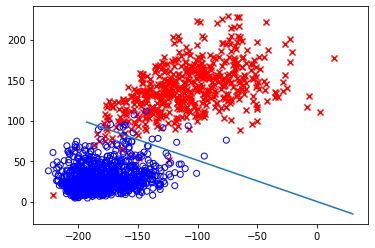

In [1524]:
plt.figure()
plt.scatter(train_five_intensity, train_five_sym, marker = "x", color = "red")
plt.scatter(train_one_intensity, train_one_sym, marker = 'o', facecolors = "None", color = 'blue')

gx = -(w[0] * x[0])

plt.plot(x[0], gx)
plt.show()

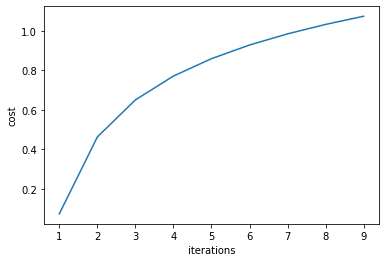

In [1525]:
iterations = [i for i in range(len(err))]

plt.figure()
plt.xlabel("iterations")
plt.ylabel("cost")
plt.plot(iterations, err)

In [1478]:
File_data_test = np.loadtxt("ZipDigits.test", dtype=float)
filtered_test = []

for i in range(len(File_data_test)):
    if File_data_test[i][0] == 1.00 or File_data_test[i][0] == 5.000:
        filtered_test.append(File_data_test[i])
        


five_test = []
one_test = []
for i in range(len(filtered_test)):
    if filtered_test[i][0] == 5.00:
        temp = filtered_test[i][1:]
        five_test.append(temp)
        
for i in range(len(filtered_test)):
    if filtered_test[i][0] == 1.00:
        temp = filtered[i][1:]
        one_test.append(temp)

In [1479]:
final_one_test = []
final_five_test = []
shape = (16,16)

for i in one_test:
    final_one_test.append(i.reshape(shape))
    
for i in five_test:
    final_five_test.append(i.reshape(shape))



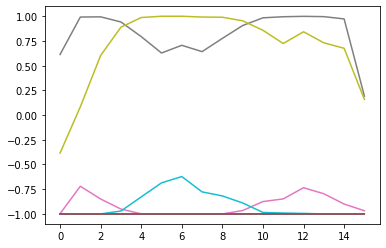

In [1480]:
plt.figure()
plt.plot(final_one_test[1])
plt.show()

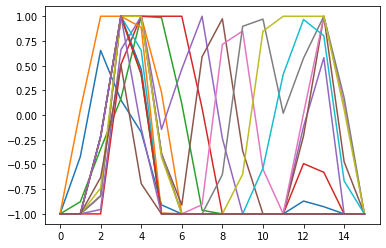

In [1481]:
plt.figure()
plt.plot(final_five_test[1])
plt.show()

In [1482]:
test_one_intensity = []
for i in range(len(final_one_test)):
    test_one_intensity.append((sum(sum(final_one_test[i]))))


test_five_intensity = []
for i in range(len(final_five_test)):
    test_five_intensity.append((sum(sum(final_five_test[i]))))

In [1483]:
test_one_sym = []
for i in range(len(final_one_test)):
    test_one_sym.append(sum(sum(np.abs(final_one_test[i] - np.fliplr(final_one_test[i])))))
    
    
test_five_sym = []
for i in range(len(final_five_test)):
    test_five_sym.append(sum(sum(np.abs(final_five_test[i] - np.fliplr(final_five_test[i])))))

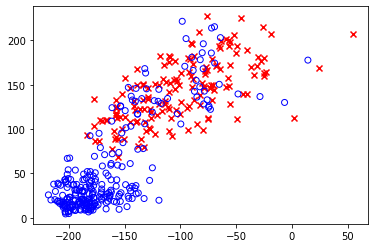

In [1484]:
plt.figure()
plt.scatter(test_five_intensity, test_five_sym, marker = "x", color = "red")
plt.scatter(test_one_intensity, test_one_sym, marker = 'o', facecolors = "None", color = 'blue')
plt.show()

In [1529]:
x1 = test_one_sym + test_five_sym
x2 = test_one_intensity + test_five_intensity

x1 = np.array(x1)
x2 = np.array(x2)

x = list()

x.append(x1)
x.append(x2)

x = np.array(x)

y = list()

for i in range(len(test_one_sym)):
    y.append(np.array([1]))
    
for i in range(len(test_five_sym)):
    y.append(np.array([-1]))
    
y = np.array(y)
x = x.T

w, i, err = logistic_reg(x, y, 10)

print(w)

[[ 0.54716417]
 [-0.34216054]]


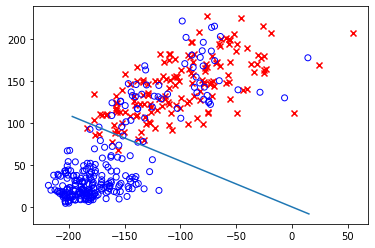

In [1530]:
plt.figure()
plt.scatter(test_five_intensity, test_five_sym, marker = "x", color = "red")
plt.scatter(test_one_intensity, test_one_sym, marker = 'o', facecolors = "None", color = 'blue')

gx = -(w[0] * x[1])

plt.plot(x[1], gx)
plt.show()

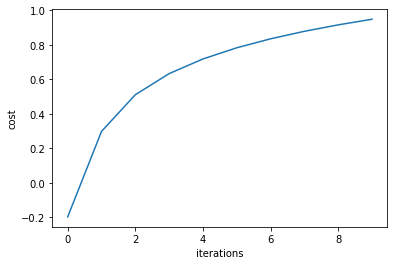

In [1531]:
iterations = [i for i in range(len(err))]

plt.figure()
plt.plot(iterations, err)
plt.ylabel("cost")
plt.xlabel("iterations")